# Guia da Camada de Rede
### A camada de rede serve para o cliente pedir uma requisição de rota entre dois pontos (Alice e Bob) e que seja atendida por uma rota escolhida e adequada.

#### IMPORTANDO AS DEPENDÊNCIAS
##### Este documento tem como objetivo demostrar a execução da camada de rede, além de suas funcionalidades. 

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
Logger.activate(Logger)

#### Ao importar as dependências, vamos instaciar a rede com 20 qubits em cada host e 10 pares EPRS em cada canal da topologia. 

2024-09-10 16:40:35,414: Qubit 0 adicionado à memória do Host 0.
2024-09-10 16:40:35,422: Qubit 0 criado com fidelidade inicial 0.4208638568633515 e adicionado à memória do Host 0.
2024-09-10 16:40:35,436: Qubit 1 adicionado à memória do Host 0.
2024-09-10 16:40:35,440: Qubit 1 criado com fidelidade inicial 0.5470646759250539 e adicionado à memória do Host 0.
2024-09-10 16:40:35,445: Qubit 2 adicionado à memória do Host 0.
2024-09-10 16:40:35,455: Qubit 2 criado com fidelidade inicial 0.4758316766918478 e adicionado à memória do Host 0.
2024-09-10 16:40:35,462: Qubit 3 adicionado à memória do Host 0.
2024-09-10 16:40:35,468: Qubit 3 criado com fidelidade inicial 0.17920896854097224 e adicionado à memória do Host 0.
2024-09-10 16:40:35,469: Qubit 4 adicionado à memória do Host 0.
2024-09-10 16:40:35,469: Qubit 4 criado com fidelidade inicial 0.9954739070979196 e adicionado à memória do Host 0.
2024-09-10 16:40:35,470: Qubit 5 adicionado à memória do Host 0.
2024-09-10 16:40:35,471: Qubi

2024-09-10 16:40:35,567: Qubit 10 adicionado à memória do Host 1.
2024-09-10 16:40:35,586: Qubit 10 criado com fidelidade inicial 0.060768066709120605 e adicionado à memória do Host 1.
2024-09-10 16:40:35,588: Qubit 11 adicionado à memória do Host 1.
2024-09-10 16:40:35,590: Qubit 11 criado com fidelidade inicial 0.5627441587751053 e adicionado à memória do Host 1.
2024-09-10 16:40:35,590: Qubit 12 adicionado à memória do Host 1.
2024-09-10 16:40:35,591: Qubit 12 criado com fidelidade inicial 0.6666047444845234 e adicionado à memória do Host 1.
2024-09-10 16:40:35,592: Qubit 13 adicionado à memória do Host 1.
2024-09-10 16:40:35,593: Qubit 13 criado com fidelidade inicial 0.17470715240130053 e adicionado à memória do Host 1.
2024-09-10 16:40:35,597: Qubit 14 adicionado à memória do Host 1.
2024-09-10 16:40:35,598: Qubit 14 criado com fidelidade inicial 0.4515179450442858 e adicionado à memória do Host 1.
2024-09-10 16:40:35,599: Qubit 15 adicionado à memória do Host 1.
2024-09-10 16:40

Hosts inicializados
Canais inicializados


2024-09-10 16:40:36,241: Par EPR <quantumnet.objects.epr.Epr object at 0x72e834200490> adicionado ao canal.
2024-09-10 16:40:36,245: Par EPR <quantumnet.objects.epr.Epr object at 0x72e834200430> adicionado ao canal.
2024-09-10 16:40:36,249: Par EPR <quantumnet.objects.epr.Epr object at 0x72e8342007c0> adicionado ao canal.
2024-09-10 16:40:36,256: Par EPR <quantumnet.objects.epr.Epr object at 0x72e834200820> adicionado ao canal.
2024-09-10 16:40:36,259: Par EPR <quantumnet.objects.epr.Epr object at 0x72e8342006d0> adicionado ao canal.
2024-09-10 16:40:36,265: Par EPR <quantumnet.objects.epr.Epr object at 0x72e8342008e0> adicionado ao canal.
2024-09-10 16:40:36,270: Par EPR <quantumnet.objects.epr.Epr object at 0x72e8342009a0> adicionado ao canal.
2024-09-10 16:40:36,271: Par EPR <quantumnet.objects.epr.Epr object at 0x72e834200af0> adicionado ao canal.
2024-09-10 16:40:36,273: Par EPR <quantumnet.objects.epr.Epr object at 0x72e834200a00> adicionado ao canal.
2024-09-10 16:40:36,280: Par

Pares EPRs adicionados


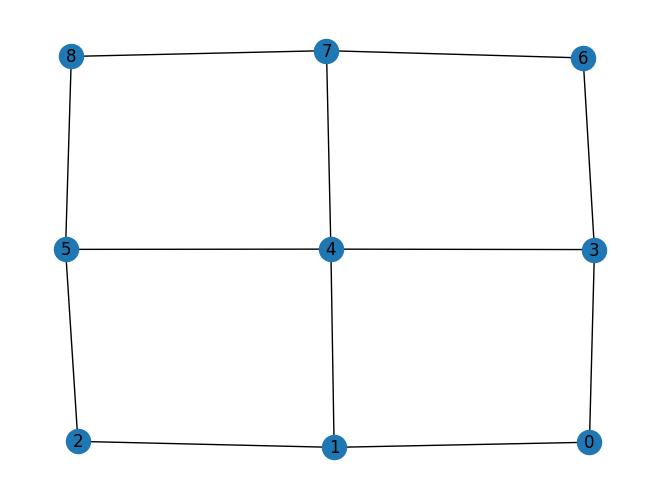

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

In [3]:
alice = rede.get_host(6)
bob = rede.get_host(1)

##### Nesse sentido, primeiramente precisa-se escolher a melhor rota e seus critérios são dados pela rota com menor caminho. Para verificar isso usaremos a função short_route_valid, que irá entregar uma rota válida entre Alice e Bob. 

In [4]:
rede.networklayer.short_route_valid(8,0)

2024-09-10 16:40:38,968: Timeslot 1: Buscando rota válida entre 8 e 0.


2024-09-10 16:40:39,000: Rota válida encontrada: [8, 5, 2, 1, 0]


[8, 5, 2, 1, 0]

In [5]:
# rede.networklayer.get_avg_size_routes()

##### Para a rota ser válida, precisa-se verificar se cada canal da rede tem peloo menos 1 par EPR e se nó tem 2 qubits. Através dessas funções podemos verificar.

##### Dessa forma, vamos realizar o entanglement swapping entre Alice e Bob, o que permite criar um par de qubits emaranhados entre dois nós que não têm uma conexão direta de emaranhamento, utilizando pares intermediários.

In [6]:
rede.networklayer.entanglement_swapping(8,0)

2024-09-10 16:40:39,226: Timeslot 2: Buscando rota válida entre 8 e 0.
2024-09-10 16:40:39,239: Rota válida encontrada: [8, 5, 2, 1, 0]
2024-09-10 16:40:39,240: Timeslot 3: Realizando Entanglement Swapping.
2024-09-10 16:40:39,240: Par EPR <quantumnet.objects.epr.Epr object at 0x72e81c53bf10> adicionado ao canal (8, 2).
2024-09-10 16:40:39,250: Par EPR <quantumnet.objects.epr.Epr object at 0x72e834200880> removido do canal (8, 5).
2024-09-10 16:40:39,253: Par EPR <quantumnet.objects.epr.Epr object at 0x72e83418b760> removido do canal (5, 2).
2024-09-10 16:40:39,253: Timeslot 4: Realizando Entanglement Swapping.
2024-09-10 16:40:39,255: Par EPR <quantumnet.objects.epr.Epr object at 0x72e83418b760> adicionado ao canal (8, 1).
2024-09-10 16:40:39,255: Par EPR <quantumnet.objects.epr.Epr object at 0x72e81c53bf10> removido do canal (8, 2).
2024-09-10 16:40:39,256: Par EPR <quantumnet.objects.epr.Epr object at 0x72e83418bcd0> removido do canal (2, 1).
2024-09-10 16:40:39,257: Timeslot 5: Rea

True

In [7]:
rede.networklayer.get_avg_size_routes()

2024-09-10 16:40:39,440: Rota válida encontrada: [0, 1]
2024-09-10 16:40:39,461: Rota válida encontrada: [0, 1, 2]
2024-09-10 16:40:39,491: Rota válida encontrada: [0, 3]
2024-09-10 16:40:39,514: Rota válida encontrada: [0, 3, 4]
2024-09-10 16:40:39,529: Rota válida encontrada: [0, 8, 5]
2024-09-10 16:40:39,565: Rota válida encontrada: [0, 3, 6]
2024-09-10 16:40:39,571: Rota válida encontrada: [0, 8, 7]
2024-09-10 16:40:39,572: Rota válida encontrada: [0, 8]
2024-09-10 16:40:39,572: Rota válida encontrada: [1, 0]
2024-09-10 16:40:39,573: Rota válida encontrada: [1, 2]
2024-09-10 16:40:39,574: Rota válida encontrada: [1, 0, 3]
2024-09-10 16:40:39,575: Rota válida encontrada: [1, 4]
2024-09-10 16:40:39,580: Rota válida encontrada: [1, 4, 5]
2024-09-10 16:40:39,587: Rota válida encontrada: [1, 0, 3, 6]
2024-09-10 16:40:39,588: Rota válida encontrada: [1, 4, 7]
2024-09-10 16:40:39,589: Sem pares EPRs entre 1 e 8 na rota [1, 8]
2024-09-10 16:40:39,590: Nenhuma rota válida encontrada.
2024-0

2.6875

In [8]:
rede.get_total_useds_eprs()

2024-09-10 16:40:39,933: Eprs usados na camada PhysicalLayer: 0
2024-09-10 16:40:39,956: Eprs usados na camada LinkLayer: 0
2024-09-10 16:40:39,972: Eprs usados na camada NetworkLayer: 3


3

In [9]:
rede.get_eprs_from_edge(8,0)

In [10]:
rede.get_timeslot()

6